In [1]:
from learning_center import *
from matplotlib import pyplot as plt
import numpy as np

In [19]:
#runData = specify runData directory, CFD-Data is available on request.

#### Initialize design assistant: ###

In [3]:
l = learning_center(runData = runData, cluster_anzahl = 20)

First Object: Retrain first:
*** Start Retrain ***
Time taken for sorting and loading File-List: 4.704426288604736 seconds
Time taken for loading: 1.5360240936279297 seconds
Loaded Tensors from  b1
Time taken for sorting and loading File-List: 0.1230778694152832 seconds
Time taken for loading: 1.4883673191070557 seconds
Loaded Tensors from  b2
Time taken for sorting and loading File-List: 0.1217648983001709 seconds
Time taken for loading: 1.2432265281677246 seconds
Loaded Tensors from  b3
Time taken for sorting and loading File-List: 0.12354373931884766 seconds
Time taken for loading: 1.2343425750732422 seconds
Loaded Tensors from  b4
Time taken for sorting and loading File-List: 0.12402224540710449 seconds
Time taken for loading: 1.2116708755493164 seconds
Loaded Tensors from  b5
Time taken for sorting and loading File-List: 0.12572717666625977 seconds
Time taken for loading: 1.231553316116333 seconds
Loaded Tensors from  b6
Time taken for sorting and loading File-List: 0.122531652450

#### Train AutoEncoder: ###
If use of cuda-capable device, use pretrained model.

In [4]:
#l.train_model_c_all(max_iter = 40)

#### Cluster Latent Space: ###
Extracting latent data, clustering and assessment of cluster-ids.
(Routine is already executed when initializing first object of learning_center,
following methods provide manual workflow )

In [5]:
l.load_tensors(normalize = True)
l.get_latent_data()
l.get_cluster_ids(mode = 'all')

Time taken for sorting and loading File-List: 4.489010810852051 seconds
Time taken for loading: 0.2712743282318115 seconds
Loaded Tensors from  b1
Time taken for sorting and loading File-List: 0.1200709342956543 seconds
Time taken for loading: 0.6833629608154297 seconds
Loaded Tensors from  b2
Time taken for sorting and loading File-List: 0.12537860870361328 seconds
Time taken for loading: 1.2613284587860107 seconds
Loaded Tensors from  b3
Time taken for sorting and loading File-List: 0.12307476997375488 seconds
Time taken for loading: 1.2746365070343018 seconds
Loaded Tensors from  b4
Time taken for sorting and loading File-List: 0.14341187477111816 seconds
Time taken for loading: 1.2871718406677246 seconds
Loaded Tensors from  b5
Time taken for sorting and loading File-List: 0.12305736541748047 seconds
Time taken for loading: 1.164435625076294 seconds
Loaded Tensors from  b6
Time taken for sorting and loading File-List: 0.1277153491973877 seconds
Time taken for loading: 1.15926480293

#### NN Mapping for Cluster-ID Prediction: ####
Multiclass Prediction Neural Network is trained to predict future turbines' cluster-id.
Testdata are the latest size_testdata individuals.
(Routine is already executed when initializing first object of learning_center,
following methods provide manual workflow )

In [6]:
l.fit_data(solver='lbfgs', validation_fraction=0.1, hidden_layer = (64,54), size_testdata = 15, activation = 'relu' )

Accuracy: 100.00% for area b1.
Accuracy on Test-Data: 73.33% for area b1.
Accuracy: 100.00% for area b2.
Accuracy on Test-Data: 73.33% for area b2.
Accuracy: 100.00% for area b3.
Accuracy on Test-Data: 66.67% for area b3.
Accuracy: 100.00% for area b4.
Accuracy on Test-Data: 73.33% for area b4.
Accuracy: 100.00% for area b5.
Accuracy on Test-Data: 66.67% for area b5.
Accuracy: 99.63% for area b6.
Accuracy on Test-Data: 86.67% for area b6.
Accuracy: 99.63% for area b7.
Accuracy on Test-Data: 80.00% for area b7.
Accuracy: 100.00% for area b8.
Accuracy on Test-Data: 86.67% for area b8.


#### Have a look at the results: ####

In [7]:
#Choose turbine your are interested in:
case_id = 594

In [8]:
l.get_data(case_id)

Case-Data for T1_594.
[Fmean,        F,           Objectives]


[0.08321132916698967,
 array([0.07425706, 0.00443709, 0.17093984]),
 array([-0.06271652, -0.03919215, -0.13290157,  0.01856896,  0.02762934,
        -0.00737009,  1.40571374,  1.16890676,  1.35450633,  0.4140224 ,
         0.44333802,  0.52739265, -0.04833411, -0.09692301, -0.1216935 ,
         0.55247893,  0.87912153,  1.18555713,  0.05316972,  0.05490793,
         0.04373558,  0.02994582,  0.03254256,  0.04723693,  0.00625185,
         0.02125665,  0.04089324,  0.54722101,  0.43719302,  0.55978769])]

In [9]:
cluster_id = l.give_cluster_id(case_id)
cluster_id

Cluster_id for case T1_594


array([[ 4, 12,  5,  2, 15, 12, 14,  6]], dtype=int32)

In [10]:
print(f"See all individuals with cluster-id: {cluster_id[0]}.")
l.give_fitness(cluster_id)

See all individuals with cluster-id: [ 4 12  5  2 15 12 14  6].
[CaseIDs,   Objectives,   Fitness-Werte,   Fitness-Mittelwert, Eta, dH , VCav, P ]


[array(['T1_594_all'], dtype='<U10'),
 array([[-0.06271652, -0.03919215, -0.13290157,  0.01856896,  0.02762934,
         -0.00737009,  1.40571374,  1.16890676,  1.35450633,  0.4140224 ,
          0.44333802,  0.52739265, -0.04833411, -0.09692301, -0.1216935 ,
          0.55247893,  0.87912153,  1.18555713,  0.05316972,  0.05490793,
          0.04373558,  0.02994582,  0.03254256,  0.04723693,  0.00625185,
          0.02125665,  0.04089324,  0.54722101,  0.43719302,  0.55978769]]),
 array([[0.07425706, 0.00443709, 0.17093984]]),
 array([0.08321133]),
 array([[-0.91794817, -0.92980311, -0.92947754]]),
 array([[-1.59257245, -2.57093984, -3.52789033]]),
 array([[3.03431600e-07, 2.14024556e-03, 1.11707201e-02]]),
 array([[-215525.72325141, -414615.67731699, -654055.52512651]])]

In [11]:
print('Best performing five cluster-ids')
l.cluster_ids_valued[0][0:5]

Best performing five cluster-ids


[array([10, 15,  1,  6,  7, 11, 19,  3], dtype=int32),
 array([ 4, 13,  6, 17,  5, 13, 10, 11], dtype=int32),
 array([ 4,  7,  5,  2, 15, 12, 10,  6], dtype=int32),
 array([18, 10,  8,  2, 11, 18,  7,  8], dtype=int32),
 array([ 4,  4,  6, 17,  5, 18,  1,  1], dtype=int32)]

In [12]:
#l.give_fitness(l.cluster_ids_valued[0][2])

#### Plot Pressure Field of Cluster-ID: ####

In [13]:
### you must reload Tensors befor plotting is possible ###
l.load_tensors()

Time taken for sorting and loading File-List: 18.16393804550171 seconds
Time taken for loading: 0.26793861389160156 seconds
Loaded Tensors from  b1
Time taken for sorting and loading File-List: 0.12474346160888672 seconds
Time taken for loading: 0.2523059844970703 seconds
Loaded Tensors from  b2
Time taken for sorting and loading File-List: 0.12136626243591309 seconds
Time taken for loading: 0.23044276237487793 seconds
Loaded Tensors from  b3
Time taken for sorting and loading File-List: 0.1298520565032959 seconds
Time taken for loading: 0.2351388931274414 seconds
Loaded Tensors from  b4
Time taken for sorting and loading File-List: 0.13251113891601562 seconds
Time taken for loading: 1.4530694484710693 seconds
Loaded Tensors from  b5
Time taken for sorting and loading File-List: 0.1251065731048584 seconds
Time taken for loading: 3.595165967941284 seconds
Loaded Tensors from  b6
Time taken for sorting and loading File-List: 0.1263425350189209 seconds
Time taken for loading: 3.6354129314

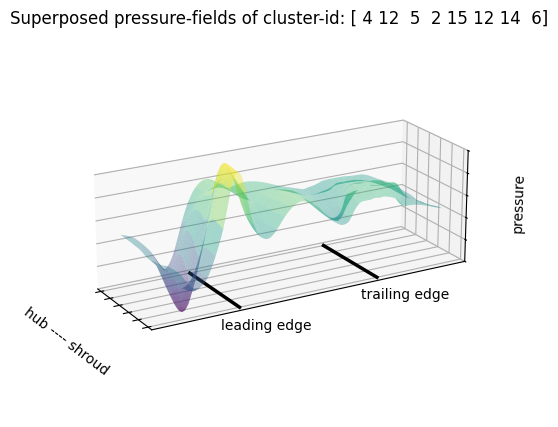

In [14]:
l.plot_tensor_all(cluster_id[0])

#### Recommendation and Prediction based on DOFs (x): ####
Obviously, already simulated cases aren't that hard to predict.
But nevertheless here given as an example:

In [15]:
case_id = 594
x = l.case_data[1][case_id - 1 ]

print("Recommendation for DOFs:\n")
recommend = l.recommend_sim([x])

print(f'Correct Fitness: {l.case_data[2][case_id-1]}')

Recommendation for DOFs:

EVAL CONTER = 1
Recommend Sim: True. Known Cluster_ID: True. Gaussian Estimation: False.
Predicted Fitness: [0.07425706 0.00443709 0.17093984]
Correct Fitness: [0.07425706 0.00443709 0.17093984]


In [16]:
#### Test on unkown data: ###

In [17]:
objectives = np.load('./prediction_data/objectives.npy')
fitness_resimulated = np.load('./prediction_data/fitness.npy')

In [18]:
#case_predict = np.random.randint(0,objectives.shape[0])
case_predict = 1
recommend = l.recommend_sim([objectives[case_predict]])
print(f"Correct Fitness: {fitness_resimulated[case_predict]}.")

EVAL CONTER = 2
Recommend Sim: False. Known Cluster_ID: True. Gaussian Estimation: False.
Predicted Fitness: [0.09107862 0.00443665 0.03530737]
Correct Fitness: [0.09333277 0.00439002 0.0331774 ].
